In [ ]:
from time import time as now
import numpy as np
import smoothing, eval, sys, path_generator
from main import eval_time

In [3]:
# Main computation

kalman_rw = eval_time(smoothing.kalman, path_gen=path_generator.generate_random_walk)
bezier_rw = eval_time(smoothing.bezier_divided, path_gen=path_generator.generate_random_walk)
kalman_rrt = eval_time(smoothing.kalman, path_gen=path_generator.generate_rrt)
bezier_rrt = eval_time(smoothing.bezier, path_gen=path_generator.generate_rrt)

**************
[1/20] N = 1
[2/20] N = 6
[3/20] N = 11
[4/20] N = 16
[5/20] N = 21
[6/20] N = 26
[7/20] N = 31
[8/20] N = 36
[9/20] N = 41
[10/20] N = 46
[11/20] N = 51
[12/20] N = 56
[13/20] N = 61
[14/20] N = 66
[15/20] N = 71
[16/20] N = 76
[17/20] N = 81
[18/20] N = 86
[19/20] N = 91
[20/20] N = 96
**************
[1/20] N = 1
[2/20] N = 6
[3/20] N = 11
[4/20] N = 16
[5/20] N = 21
[6/20] N = 26
[7/20] N = 31
[8/20] N = 36
[9/20] N = 41
[10/20] N = 46
[11/20] N = 51
[12/20] N = 56
[13/20] N = 61
[14/20] N = 66
[15/20] N = 71
[16/20] N = 76
[17/20] N = 81
[18/20] N = 86
[19/20] N = 91
[20/20] N = 96
**************
[1/20] N = 1
[2/20] N = 6
[3/20] N = 11
[4/20] N = 16
[5/20] N = 21
[6/20] N = 26
[7/20] N = 31
[8/20] N = 36
[9/20] N = 41
[10/20] N = 46
[11/20] N = 51
[12/20] N = 56
[13/20] N = 61
[14/20] N = 66
[15/20] N = 71
[16/20] N = 76
[17/20] N = 81
[18/20] N = 86
[19/20] N = 91
[20/20] N = 96
**************
[1/20] N = 1
[2/20] N = 6
[3/20] N = 11
[4/20] N = 16
[5/20] N = 21
[6/20

In [6]:
%store kalman_rw
%store bezier_rw
%store kalman_rrt
%store bezier_rrt

Stored 'kalman_rw' (list)
Stored 'bezier_rw' (list)
Stored 'kalman_rrt' (list)
Stored 'bezier_rrt' (list)


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.spatial.distance import cdist
from main import N_LIST

kf_rw_mean, kf_rw_std, kf_rw_len = kalman_rw
bz_rw_mean, bz_rw_std, bz_rw_len = bezier_rw
kf_rrt_mean, kf_rrt_std, kf_rrt_len = kalman_rrt
bz_rrt_mean, bz_rrt_std, bz_rrt_len = bezier_rrt

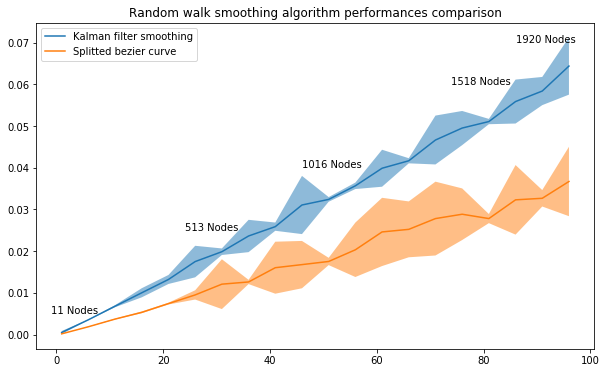

In [76]:
plt.figure(figsize=(10,6))
#plt.subplot(211)

plt.plot(N_LIST, kf_rw_mean, label='Kalman filter smoothing')
plt.fill_between(N_LIST, kf_rw_mean - kf_rw_std, kf_rw_mean + kf_rw_std, alpha=.5)
plt.plot(N_LIST, bz_rw_mean, label='Splitted bezier curve')
plt.fill_between(N_LIST, bz_rw_mean - bz_rw_std, bz_rw_mean + bz_rw_std, alpha=.5)

plt.annotate('%d Nodes' % kf_rw_len[0], xy=(N_LIST[0], kf_rw_mean[0]), xytext=(N_LIST[0]-2, 0.005))
plt.annotate('%d Nodes' % kf_rw_len[5], xy=(N_LIST[5], kf_rw_mean[5]), xytext=(N_LIST[5]-2, 0.025))
plt.annotate('%d Nodes' % kf_rw_len[10], xy=(N_LIST[10], kf_rw_mean[10]), xytext=(N_LIST[10]-5, 0.04))
plt.annotate('%d Nodes' % kf_rw_len[15], xy=(N_LIST[15], kf_rw_mean[15]), xytext=(N_LIST[15]-2, 0.06))
plt.annotate('%d Nodes' % kf_rw_len[19], xy=(N_LIST[19], kf_rw_mean[19]), xytext=(N_LIST[19]-10, 0.07))

plt.legend(loc='upper left')
plt.title('Random walk smoothing algorithm performances comparison')

"""
plt.subplot(212)

plt.plot(N_LIST, kf_rrt_mean, label='Kalman filter smoothing')
plt.fill_between(N_LIST, kf_rrt_mean - kf_rrt_std, kf_rrt_mean + kf_rrt_std, alpha=.5)
plt.plot(N_LIST, bz_rrt_mean, label='Splitted bezier curve')
plt.fill_between(N_LIST, bz_rrt_mean - bz_rrt_std, bz_rrt_mean + bz_rrt_std, alpha=.5)

plt.annotate('%d Nodes' % bz_rrt_len[0], xy=(N_LIST[0], bz_rrt_mean[0]), xytext=(N_LIST[0]-2, bz_rrt_mean[0]+0.01))
plt.annotate('%d Nodes' % bz_rrt_len[5], xy=(N_LIST[5], bz_rrt_mean[5]), xytext=(N_LIST[5]-3, bz_rrt_mean[5]+0.03))
plt.annotate('%d Nodes' % bz_rrt_len[10], xy=(N_LIST[10], bz_rrt_mean[10]), xytext=(N_LIST[10]-1, bz_rrt_mean[10]+0.01))
plt.annotate('%d Nodes' % bz_rrt_len[15], xy=(N_LIST[15], bz_rrt_mean[15]), xytext=(N_LIST[15]+1, bz_rrt_mean[15]+0.02))
plt.annotate('%d Nodes' % bz_rrt_len[19], xy=(N_LIST[19], bz_rrt_mean[19]), xytext=(N_LIST[19]-7, bz_rrt_mean[19]+0.02))

plt.legend(loc='upper left')
plt.title('RRT* path smoothing algorithm performances comparison')
"""
plt.savefig('time.png')